In [1]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def f_levels(x, levels=None):
    if levels is None:
        levels = [
            (0.1, 0.1),
            (0.7, 0.6),
            (0.8, 0.8)
        ]
    for thre, level in levels:
        if x < thre:
            return level
    return 1

def f_discrete(x, n_levels=5):
    r = np.linspace(0, 1, n_levels)
    for y in r:
        if x < y:
            return y
    return 1

def f(x):
    return 4*x**3 - 6*x**2 + 3*x

In [43]:
imsize = (32, 32)

In [44]:
x0, y0 = center = (15.5, 15.5)

In [45]:
r = radius = 10
r2 = r**2

In [168]:
light = np.array([-1, 1, 4])
light = v = vx, vy, vz = light/np.linalg.norm(light)

In [142]:
sphere_col = (.8, 0.2, 0.2)
light_col = (1., 0.5, 1.)

In [143]:
def get_h2(x, y, x0, y0, r2):
    return r2 - (x-x0)**2 - (y-y0)**2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


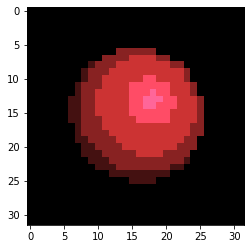

In [350]:
levels = [
    (0.15, 0.15),
    (0.3, 0.3),
    (0.75, 0.6),
    (0.97, 0.9)
]

levels = [
    (0.93, 0),
    (0.99, 0.2),
    (1., 0.4)
]

X = np.zeros((*imsize, 3))
for x, row in enumerate(X):
    for y, _ in enumerate(row):
        h2 = get_h2(x, y, x0, y0, r2)
        if h2 < 0:
            continue
        h = np.sqrt(h2)
        norm = np.array([x-x0, y-y0, h])
        norm = norm / np.linalg.norm(norm)
        norm2 = np.array([(x-x0)/h, (y-y0)/h, 1])
        norm2 = norm2 / np.linalg.norm(norm2)
        # print(norm, norm2)
        dot = np.dot(norm2, v)
        # print(dot)
        level_mat = f_discrete(dot, 4)# f_levels(dot, levels)#f_levels(dot, levels)
        level_spec = f_levels(dot, levels)
        if dot < 0:
            continue
        X[x, y, 0] = dot
        X[x, y] = [
            level_mat*sphere_col[0] + level_spec*light_col[0],
            level_mat*sphere_col[1] + level_spec*light_col[1],
            level_mat*sphere_col[2] + level_spec*light_col[2]]
            

plt.imshow(X)

# Multiple spheres and interpolation

In [6]:
from dataclasses import dataclass
import numpy as np

In [2]:
@dataclass
class Point:
    x: float
    y: float

@dataclass
class Circle:
    center: Point
    radius: float

In [28]:
def get_hi(x, y, circle):
    return (x - circle.center.x)**2 + (y - circle.center.y)**2

In [339]:
def get_h_dh(x, y, circles):
    his = []
    dhixs = []
    dhiys = []
    s_r = 0
    for circle in circles:
        s_r += circle.radius**2
        hi = get_hi(x, y, circle)
        if hi == 0:
            return 1, 1, 0, 0
        his.append(circle.radius**2/hi)
        dhixs.append(-circle.radius**2/hi**2*(x-circle.center.x))
        dhiys.append(-circle.radius**2/hi**2*(y-circle.center.y))
    h2 = 1 - 1/(sum(his))
    h = np.sqrt(h2)
    dh_front = ((1-h2)**2)/h*np.sqrt(s_r)
    dhx = dh_front*sum(dhixs)
    dhy = dh_front*sum(dhiys)
    return h, h2, dhx, dhy
        

In [499]:
v = np.array([-1, 1, 4])
v = v / np.linalg.norm(v)

In [ ]:
def compute_x_fast(circles, light):
    circles_mat = np.array([[circle.center.x, circle.center.y, circle.radius] for circle in circles])
    X = np.zeros((*imsize, 3))
    # TODO...

In [574]:
def compute_x(circles, light):
    X = np.zeros((*imsize, 3))
    for x, row in enumerate(X):
        for y, _ in enumerate(row):
            h, h2, dhx, dhy = get_h_dh(x, y, circles)
            if h2<0:
                continue
            level = h
            # print(dhx, (x-circles[0].center.x)/h)
            normal = np.array([-dhx, -dhy, 1])
            normal = normal/np.linalg.norm(normal)
            dot = np.dot(normal, light/np.linalg.norm(light))
            # print(dot)
            level_mat = f_discrete(dot, 7)# f_levels(dot, levels)#f_levels(dot, levels)
            level_spec = f_levels(dot, levels)
            X[x, y, 0] = dot
#             X[x, y] = [
#                 level_mat*sphere_col[0] + level_spec*light_col[0],
#                 level_mat*sphere_col[1] + level_spec*light_col[1],
#                 level_mat*sphere_col[2] + level_spec*light_col[2]]
    return X 

/Users/maximefournes/anaconda3/envs/research/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


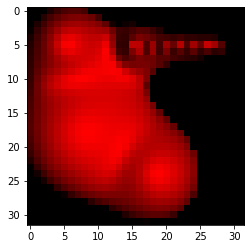

In [575]:
circles = [
    Circle(Point(5, 5), 5),
    Circle(Point(24, 18), 6),
    Circle(Point(18, 7), 8),
    Circle(Point(5.3, 15), 2),
    Circle(Point(5.5, 17), 1),
    Circle(Point(5.4, 19), 1),
    Circle(Point(5.2, 21), 1),
    Circle(Point(5.3, 23), 1),
    Circle(Point(5.2, 25), 1),
    Circle(Point(5.1, 27), 1)
]


X = compute_x(circles, np.array([0, 1, 4]))
im = plt.imshow(X, animated=True)

In [539]:
import matplotlib.animation as anim

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/maximefournes/anaconda3/envs/research/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


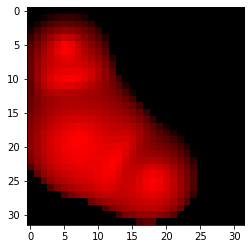

In [540]:
fig = plt.figure()

# ax.set_xlim(( 0, 2))
# ax.set_ylim((-2, 2))

im = plt.imshow(X, animated=True)

v_diff = np.array((0, 0, 0))
t = 0
def updatefig(*args):
    global t
    v = np.array([np.cos(t), np.sin(t), 4])
    t += 0.
    circles[0].center.y += 0.2
    circles[1].center.x += 0.2
    im.set_array(compute_x(circles, v))
    return im, 

ani = anim.FuncAnimation(fig, updatefig, interval=50, frames=50, blit=True)

In [541]:
HTML(ani.to_jshtml())

/Users/maximefournes/anaconda3/envs/research/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range f